In [183]:
import pandas as pd
import numpy as np
import random

In [184]:
L = []
for i in range(10000):
    L.append(random.randint(1,6))

In [185]:
len(L)

10000

In [186]:
L[:5]

[3, 3, 6, 6, 5]

In [187]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

<Axes: >

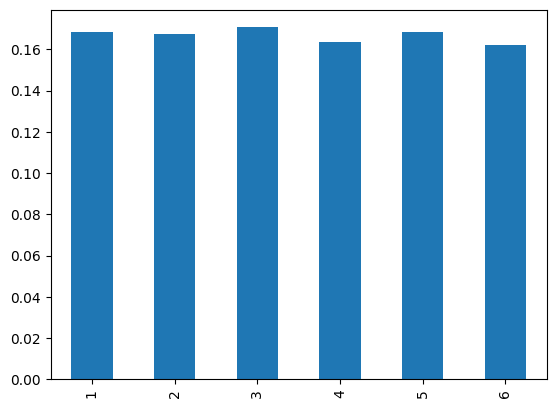

In [188]:
s.plot(kind='bar')

In [189]:
L = []
for i in range(10000):
    a = random.randint(1,6)
    b = random.randint(1,6)
    
    L.append( a + b )

In [190]:
len(L)

10000

In [191]:
L[:5]

[2, 6, 7, 9, 8]

In [192]:
r = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

<Axes: >

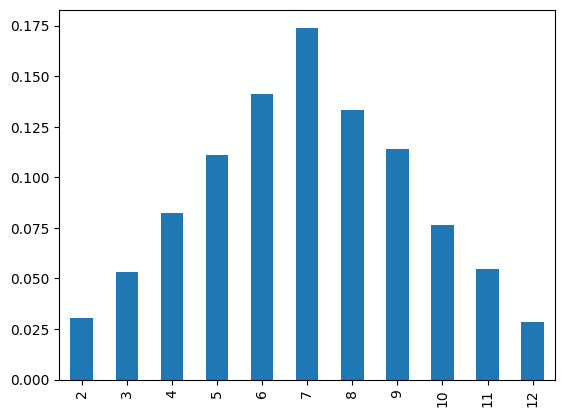

In [193]:
r.plot(kind='bar')

In [194]:
q = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()

In [195]:
np.cumsum(q)

2     0.0306
3     0.0840
4     0.1665
5     0.2775
6     0.4187
7     0.5929
8     0.7264
9     0.8407
10    0.9172
11    0.9717
12    1.0000
Name: count, dtype: float64

<Axes: >

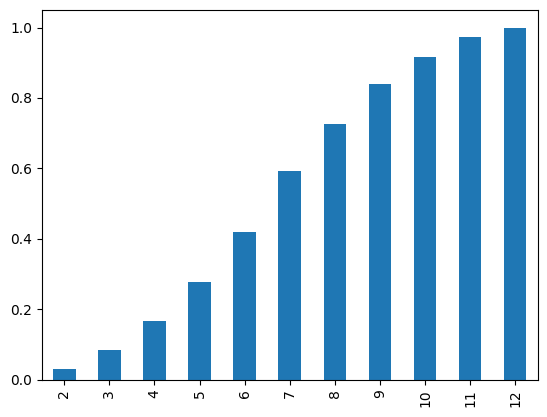

In [196]:
np.cumsum(q).plot(kind='bar')

# Parametric Density Estimation

In [197]:
import matplotlib.pyplot as plt
from numpy.random import normal

In [198]:
sample = normal(loc=50, scale=5,size=1000)

In [199]:
sample.mean()

np.float64(50.20131379930689)

(array([ 13.,  58., 104., 165., 215., 227., 124.,  61.,  27.,   6.]),
 array([37.51928736, 40.21619349, 42.91309961, 45.61000573, 48.30691186,
        51.00381798, 53.7007241 , 56.39763023, 59.09453635, 61.79144247,
        64.4883486 ]),
 <BarContainer object of 10 artists>)

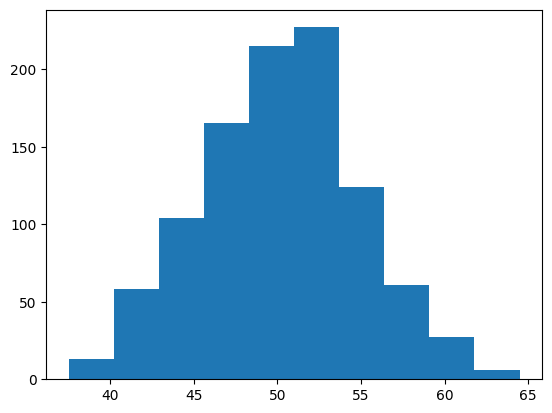

In [200]:
# Plot Histogram to understand the distribution of the Data

plt.hist(sample,bins=10)

In [201]:
# Calculate sample mean and sample std dev

sample_mean =  sample.mean()
sample_std = sample.std()

In [202]:
# Fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(sample_mean, sample_std)

In [203]:
values = np.linspace(sample.min(), sample.max(), 100)

In [204]:
sample.min()

np.float64(37.519287364667896)

In [205]:
sample.max()

np.float64(64.48834859728878)

In [206]:
probabilities = [dist.pdf(value) for value in values]

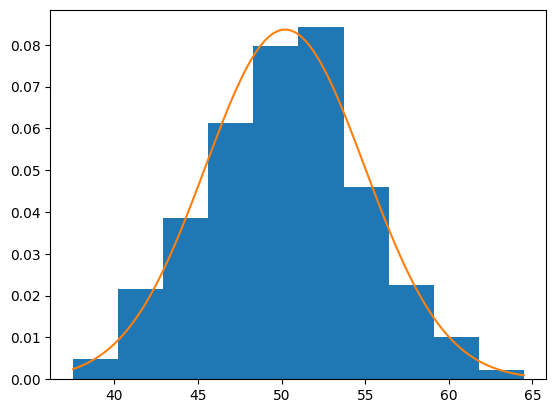

In [207]:
# Plot the histogram and pdf

plt.hist(sample, bins=10, density=True)
plt.plot(values, probabilities)


C:\Users\ACER\AppData\Local\Temp\ipykernel_15372\3900856415.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

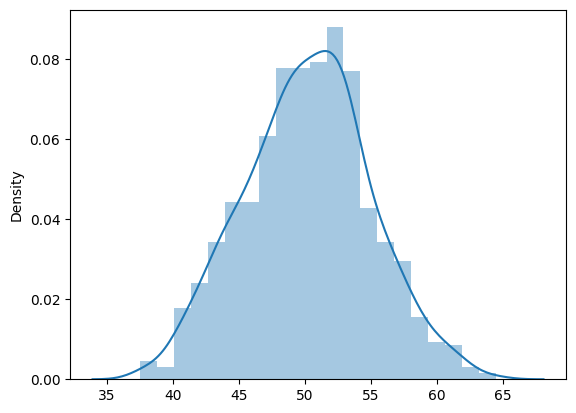

In [208]:
import seaborn as sns

sns.distplot(sample)

# KDE

In [209]:
# Generate a Sample

sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [210]:
len(sample)

1000

(array([ 4.,  1.,  4.,  4.,  5., 14., 15., 16., 11., 25., 32., 22., 19.,
        23., 23., 25., 17., 12.,  8.,  4.,  9.,  9., 12., 11., 20., 16.,
        43., 25., 37., 39., 50., 59., 54., 55., 49., 48., 47., 35., 29.,
        22., 19., 12.,  8.,  3.,  2.,  2.,  0.,  0.,  0.,  1.]),
 array([ 7.87949206,  8.86148525,  9.84347843, 10.82547162, 11.80746481,
        12.78945799, 13.77145118, 14.75344437, 15.73543756, 16.71743074,
        17.69942393, 18.68141712, 19.6634103 , 20.64540349, 21.62739668,
        22.60938986, 23.59138305, 24.57337624, 25.55536942, 26.53736261,
        27.5193558 , 28.50134898, 29.48334217, 30.46533536, 31.44732854,
        32.42932173, 33.41131492, 34.3933081 , 35.37530129, 36.35729448,
        37.33928766, 38.32128085, 39.30327404, 40.28526722, 41.26726041,
        42.2492536 , 43.23124678, 44.21323997, 45.19523316, 46.17722634,
        47.15921953, 48.14121272, 49.12320591, 50.10519909, 51.08719228,
        52.06918547, 53.05117865, 54.03317184, 55.01516503,

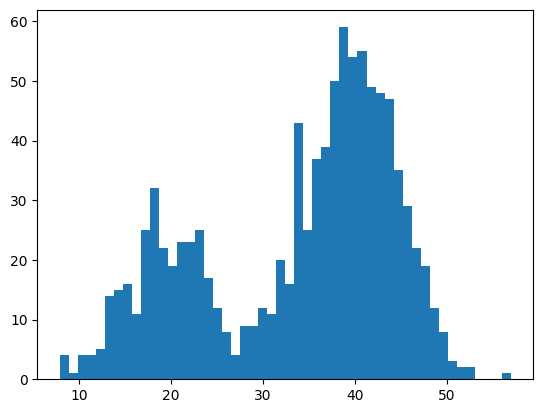

In [211]:
# Plot histogram bins = 50

plt.hist(sample, bins=50)

In [212]:

from sklearn.neighbors import KernelDensity

In [213]:
model = KernelDensity(bandwidth=3, kernel='gaussian')

In [214]:
# Convert data to a 2D array
sample = sample.reshape((len(sample), 1))

In [215]:
model.fit(sample)

KernelDensity(bandwidth=3)

In [216]:
values = np.linspace(sample.min(), sample.max(), 100)
values = values.reshape((len(values), 1))

In [217]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

`score_samples(values)` returns the log-density estimate of the input samples values. This is because the `score_samples()` method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate.

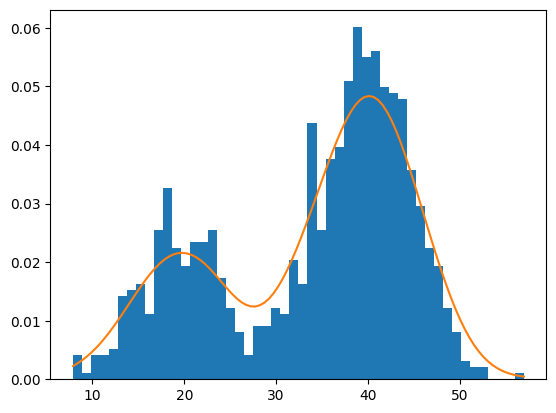

In [218]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

<Axes: ylabel='Density'>

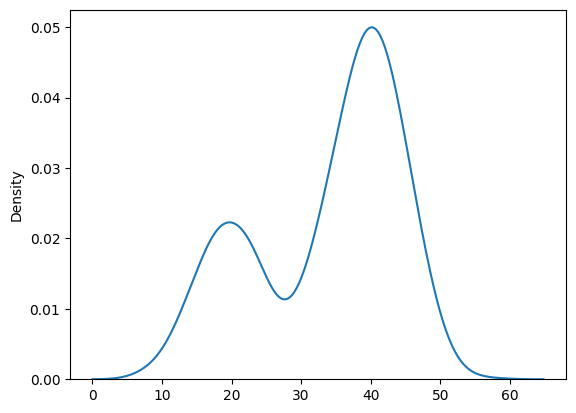

In [223]:
sns.kdeplot(sample.reshape(1000), bw_adjust=1)

In [219]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')